In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
data = pd.read_csv("Sample - Superstore.csv", encoding='latin-1')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
#Converting date columns & Ship column to datetime format:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 

In [7]:
#Adding new date based columns:
data['Order Month'] = data['Order Date'].dt.month 
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

In [8]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [16]:
#Calculation of total Monthly sales by Year

In [31]:
# Grouping by Year and Month to get monthly sales
monthly_sales = data.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# Converting month number to month name
monthly_sales['Month Name'] = monthly_sales['Order Month'].apply(lambda x: calendar.month_name[int(x)])

# Sorting by Year and Month for chronological order
monthly_sales = monthly_sales.sort_values(by=['Order Year', 'Order Month'])

# Displaying the full monthly sales table
print("Monthly Sales Table:")
print(monthly_sales)

# Identifying month with highest and lowest sales
max_sales_row = monthly_sales.loc[monthly_sales['Sales'].idxmax()]
min_sales_row = monthly_sales.loc[monthly_sales['Sales'].idxmin()]

print("\n📈 Month with Highest Sales:")
print(f"{max_sales_row['Month Name']} {int(max_sales_row['Order Year'])} - ₹{max_sales_row['Sales']:.2f}")

print("\n📉 Month with Lowest Sales:")
print(f"{min_sales_row['Month Name']} {int(min_sales_row['Order Year'])} - ₹{min_sales_row['Sales']:.2f}")

Monthly Sales Table:
    Order Year  Order Month        Sales Month Name
0         2014            1   14236.8950    January
1         2014            2    4519.8920   February
2         2014            3   55691.0090      March
3         2014            4   28295.3450      April
4         2014            5   23648.2870        May
5         2014            6   34595.1276       June
6         2014            7   33946.3930       July
7         2014            8   27909.4685     August
8         2014            9   81777.3508  September
9         2014           10   31453.3930    October
10        2014           11   78628.7167   November
11        2014           12   69545.6205   December
12        2015            1   18174.0756    January
13        2015            2   11951.4110   February
14        2015            3   38726.2520      March
15        2015            4   34195.2085      April
16        2015            5   30131.6865        May
17        2015            6   24797.2920   

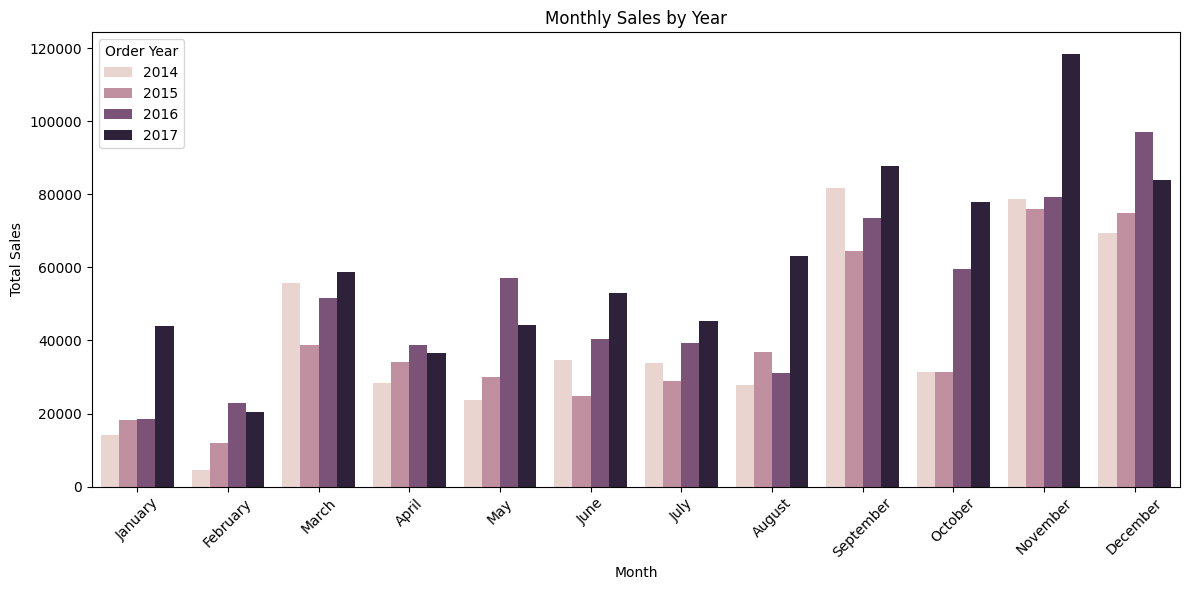

In [36]:
#Visualization Total Monthly Sales by Year

plt.figure(figsize=(12, 6))
sns.barplot(x='Month Name', y='Sales', hue='Order Year', data=monthly_sales)
plt.title('Monthly Sales by Year')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.tight_layout()

# Saving the plot
plt.savefig('monthly_sales_by_year.png', dpi=300)

# Showing the plot
plt.show()

In [ ]:
#Question1: You need to calculate the monthly sales of the store and identify which month had the highest sales and which month had the lowest sales

In [33]:
# Grouping by Order Month and calculate total sales across all years
monthly_sales_total = data.groupby('Order Month')['Sales'].sum().reset_index()

# Converting month number to month name
monthly_sales_total['Month Name'] = monthly_sales_total['Order Month'].apply(lambda x: calendar.month_name[x])

# Sorting by month number to maintain correct order
monthly_sales_total = monthly_sales_total.sort_values('Order Month')

# Displaying monthly sales
print("📊 Total Monthly Sales (Aggregated Across All Years):")
print(monthly_sales_total)

# Identifying highest and lowest sales months
max_month = monthly_sales_total.loc[monthly_sales_total['Sales'].idxmax()]
min_month = monthly_sales_total.loc[monthly_sales_total['Sales'].idxmin()]

print(f"\n✅ Month with Highest Sales: {max_month['Month Name']} - ₹{max_month['Sales']:.2f}")
print(f"✅ Month with Lowest Sales: {min_month['Month Name']} - ₹{min_month['Sales']:.2f}")

📊 Total Monthly Sales (Aggregated Across All Years):
    Order Month        Sales Month Name
0             1   94924.8356    January
1             2   59751.2514   February
2             3  205005.4888      March
3             4  137762.1286      April
4             5  155028.8117        May
5             6  152718.6793       June
6             7  147238.0970       July
7             8  159044.0630     August
8             9  307649.9457  September
9            10  200322.9847    October
10           11  352461.0710   November
11           12  325293.5035   December

✅ Month with Highest Sales: November - ₹352461.07
✅ Month with Lowest Sales: February - ₹59751.25


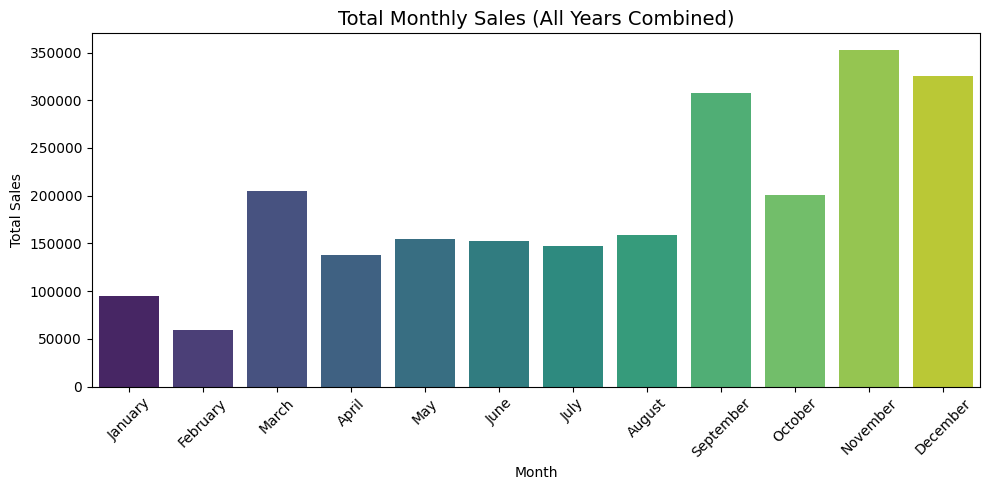

In [37]:
# Visusalisation of Total Monthly Sales (All Years Combined)
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Month Name', 
    y='Sales', 
    data=monthly_sales_total, 
    hue='Month Name',              # Add hue to avoid warning
    palette='viridis', 
    dodge=False,                   # Ensures bars don't separate
    legend=False                   # Hides unnecessary legend
)

plt.title('Total Monthly Sales (All Years Combined)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_monthly_sales_all_years.png', dpi=300) # Saving the plot
plt.show() # Showing the plot

In [38]:
#Question2. You need to analyze sales based on product categories and determine which category has the lowest sales and which category 
has the highest sales.

In [39]:
# Grouping by 'Category' and calculate total sales
category_sales = data.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Identify highest and lowest sales categories
highest_sales_category = category_sales.iloc[0]
lowest_sales_category = category_sales.iloc[-1]

print("Highest Sales Category:")
print(highest_sales_category)

print("\nLowest Sales Category:")
print(lowest_sales_category)

Highest Sales Category:
Category    Technology
Sales       836154.033
Name: 2, dtype: object

Lowest Sales Category:
Category    Office Supplies
Sales            719047.032
Name: 1, dtype: object


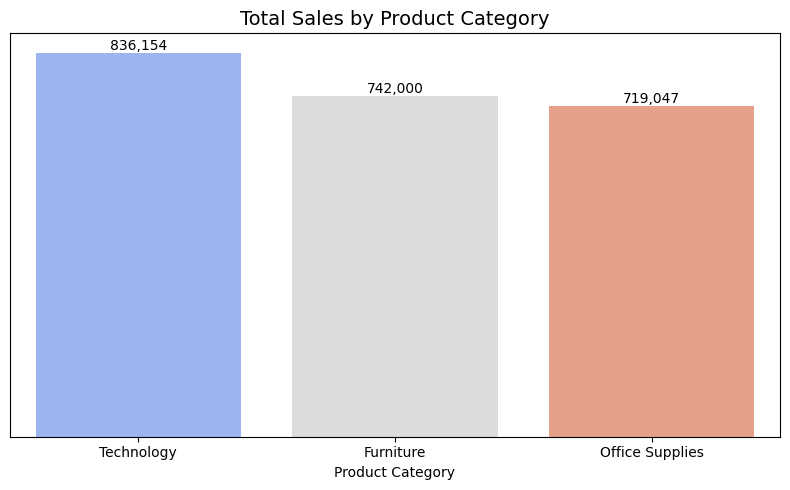

In [51]:
# Visualizing the sales by category

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Category',
    y='Sales',
    data=category_sales,
    hue='Category',
    palette='coolwarm',
    dodge=False,
    legend=False
)

# Adding data labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # x-position: middle of the bar
        height,                         # y-position: top of the bar
        f'{height:,.0f}',               # format number with commas, no decimals
        ha='center',                   # horizontal alignment center
        va='bottom'                    # vertical alignment just above the bar
    )

# Hide y-axis labels and ticks
ax.yaxis.set_visible(False)

plt.title('Total Sales by Product Category', fontsize=14)
plt.xlabel('Product Category')

plt.tight_layout()
plt.savefig('category_sales_with_labels.png', dpi=300)
plt.show()

In [52]:
#Question3: The sales analysis needs to be done based on sub-categories

In [53]:
# Grouping by Sub-Category and calculating total sales
subcat_sales = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# Identifying highest and lowest sales sub-category
highest_sales_subcat = subcat_sales.idxmax()
lowest_sales_subcat = subcat_sales.idxmin()

# Displaying result
print("📊 Sales by Sub-Category:\n")
print(subcat_sales)

print(f"\n📈 Highest Sales Sub-Category: {highest_sales_subcat} with ₹{subcat_sales.max():,.2f}")
print(f"📉 Lowest Sales Sub-Category: {lowest_sales_subcat} with ₹{subcat_sales.min():,.2f}")

📊 Sales by Sub-Category:

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91705.1640
Paper           78479.2060
Supplies        46673.5380
Art             27118.7920
Envelopes       16476.4020
Labels          12486.3120
Fasteners        3024.2800
Name: Sales, dtype: float64

📈 Highest Sales Sub-Category: Phones with ₹330,007.05
📉 Lowest Sales Sub-Category: Fasteners with ₹3,024.28


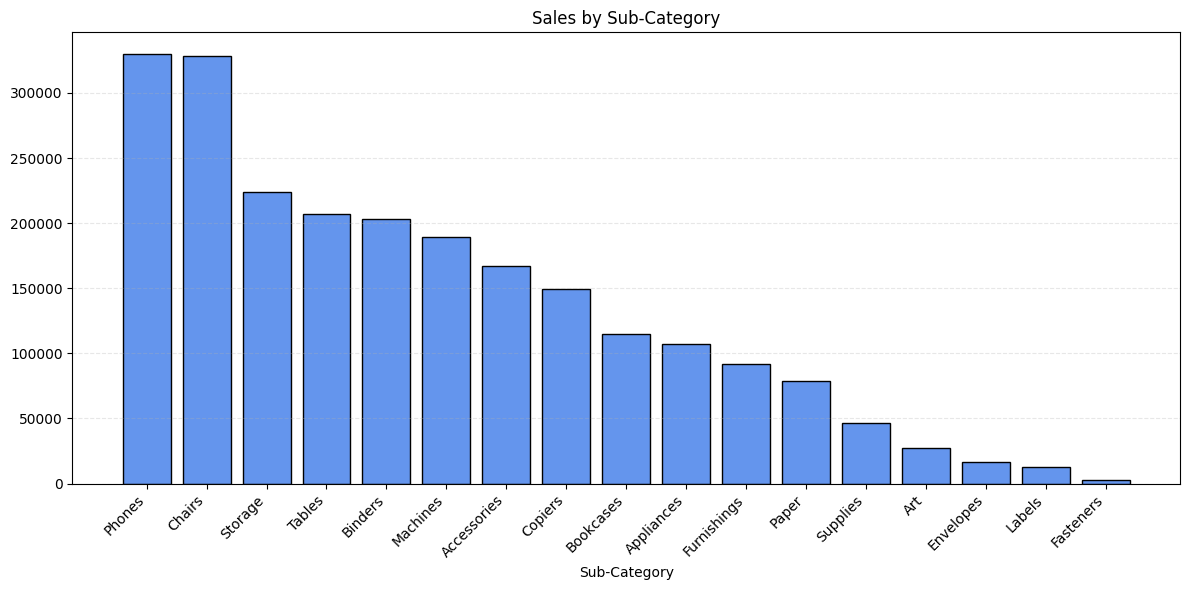

In [55]:
#Visualising the Sales by Sub-Category:

# Plotting
plt.figure(figsize=(12,6))
bars = plt.bar(subcat_sales.index, subcat_sales.values, color='cornflowerblue', edgecolor='black')

# Formatting
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.gca().axes.yaxis.set_visible
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Saving the plot
plt.savefig('sub_category_sales_chart.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show() #Showing the plot

In [56]:
#Question4. You need to analyze the monthly profit from sales and determine which month had the highest profit.

In [57]:
#Grouping by 'Order Month' and calculate total profit
monthly_profit = data.groupby('Order Month')['Profit'].sum().sort_index()

#Renaming months using calendar module
monthly_profit_named = monthly_profit.rename(index=lambda x: calendar.month_name[x])

#Identifying the month with highest profit
highest_profit_month = monthly_profit_named.idxmax()
highest_profit_value = monthly_profit_named.max()

#Displaying results
print("📊 Monthly Profit Summary:\n")
print(monthly_profit_named)

print(f"\n📈 Month with Highest Profit: {highest_profit_month} (₹{highest_profit_value:,.2f})")

📊 Monthly Profit Summary:

Order Month
January       9134.4461
February     10294.6107
March        28594.6872
April        11587.4363
May          22411.3078
June         21285.7954
July         13832.6648
August       21776.9384
September    36857.4753
October      31784.0413
November     35468.4265
December     43369.1919
Name: Profit, dtype: float64

📈 Month with Highest Profit: December (₹43,369.19)


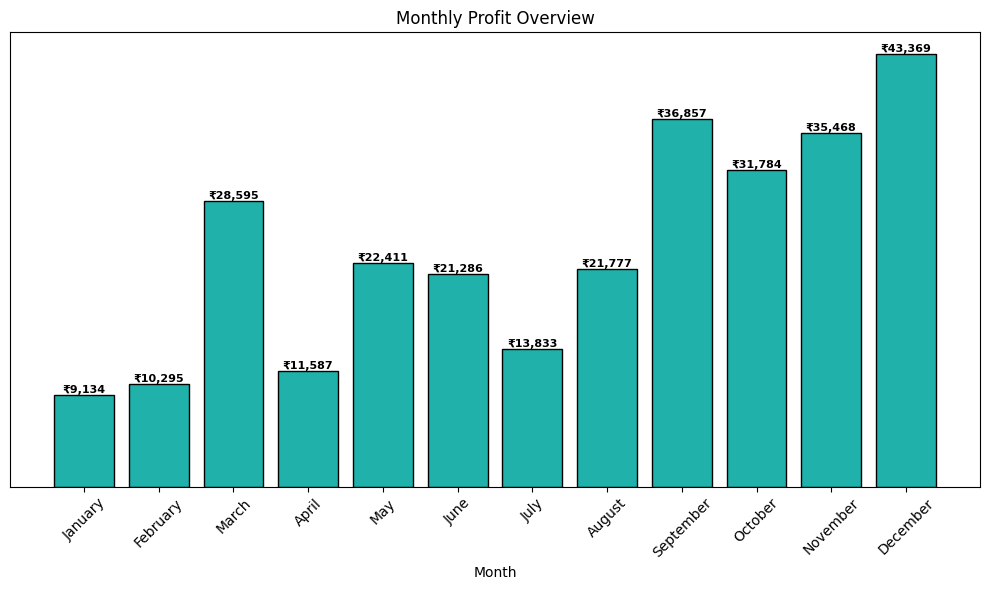

In [64]:
#Visualising Monthly Profit Overview:

plt.figure(figsize=(10,6))
bars = plt.bar(monthly_profit_named.index, monthly_profit_named.values, 
               color='lightseagreen', edgecolor='black')

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'₹{height:,.0f}', 
             ha='center', va='bottom', fontsize=8, fontweight='bold')

# Formatting
plt.title('Monthly Profit Overview')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.gca().axes.yaxis.set_visible(False)  # Hide Y-axis
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Saving chart
plt.savefig('monthly_profit_chart.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show() # Showing the plot

In [65]:
#Question 5. Analyze the profit by category and sub-category:

In [71]:
# Grouping profit by Category and Sub-Category
profit_category_subcat = data.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

# Sorting for better visualization
profit_category_subcat = profit_category_subcat.sort_values(by='Profit', ascending=False)

# Identifying highest and lowest profit sub-categories
max_profit = profit_category_subcat.loc[profit_category_subcat['Profit'].idxmax()]
min_profit = profit_category_subcat.loc[profit_category_subcat['Profit'].idxmin()]

print(profit_category_subcat)

# Identifying highest and lowest profit sub-categories
max_profit = profit_category_subcat.loc[profit_category_subcat['Profit'].idxmax()]
min_profit = profit_category_subcat.loc[profit_category_subcat['Profit'].idxmin()]

print(f"📈 Highest Profit Sub-Category: {max_profit['Sub-Category']} (Category: {max_profit['Category']}) → ₹{max_profit['Profit']:,.2f}")
print(f"📉 Lowest Profit Sub-Category: {min_profit['Sub-Category']} (Category: {min_profit['Category']}) → ₹{min_profit['Profit']:,.2f}")

           Category Sub-Category      Profit
14       Technology      Copiers  55617.8249
16       Technology       Phones  44515.7306
13       Technology  Accessories  41936.6357
10  Office Supplies        Paper  34053.5693
6   Office Supplies      Binders  30221.7633
1         Furniture       Chairs  26590.1663
11  Office Supplies      Storage  21278.8264
4   Office Supplies   Appliances  18138.0054
2         Furniture  Furnishings  13059.1436
7   Office Supplies    Envelopes   6964.1767
5   Office Supplies          Art   6527.7870
9   Office Supplies       Labels   5546.2540
15       Technology     Machines   3384.7569
8   Office Supplies    Fasteners    949.5182
12  Office Supplies     Supplies  -1189.0995
0         Furniture    Bookcases  -3472.5560
3         Furniture       Tables -17725.4811
📈 Highest Profit Sub-Category: Copiers (Category: Technology) → ₹55,617.82
📉 Lowest Profit Sub-Category: Tables (Category: Furniture) → ₹-17,725.48


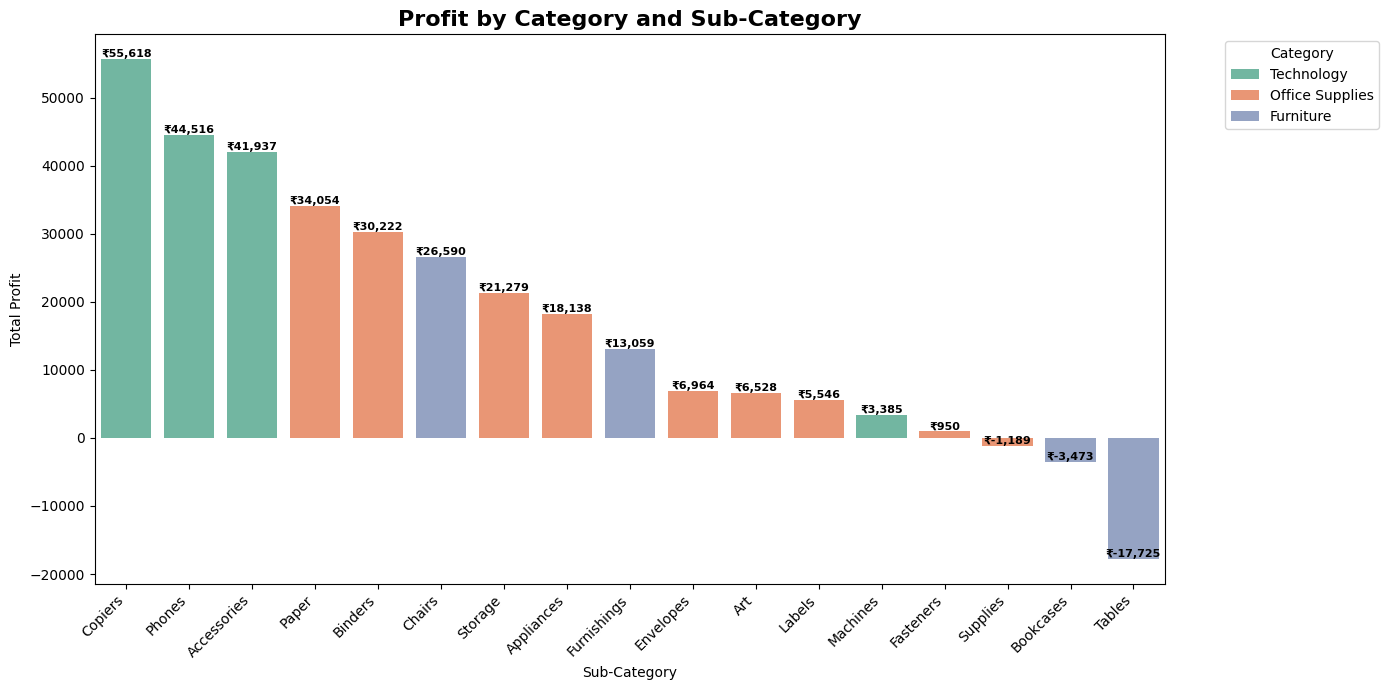

In [72]:
# Visualization – Profit by Sub-Category (Grouped by Category)
plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    x='Sub-Category',
    y='Profit',
    hue='Category',
    data=profit_category_subcat,
    palette='Set2'
)

# Adding data labels to bars
for bar in barplot.patches:
    height = bar.get_height()
    if height != 0:
        barplot.annotate(f'₹{height:,.0f}',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         ha='center', va='bottom', fontsize=8, fontweight='bold')

# Final plot formatting
plt.title('Profit by Category and Sub-Category', fontsize=16, fontweight='bold')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Saving the plot
plt.savefig('profit_by_category_subcategory.png', dpi=300)
plt.show() # Displaying the plot

In [73]:
#Question 6. Analyze the sales and profit by customer segment:

In [78]:
# Grouping by 'Segment' to get total sales and total profit
segment_analysis = data.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Adding a Profit Margin column (Profit ÷ Sales × 100)
segment_analysis['Profit Margin (%)'] = (segment_analysis['Profit'] / segment_analysis['Sales']) * 100

# Rounding for cleaner display
segment_analysis = segment_analysis.round(2)

# Displaying updated result
print("\n📈 Segment-wise Sales, Profit, and Profit Margin:\n")
print(segment_analysis)


📈 Segment-wise Sales, Profit, and Profit Margin:

                  Sales     Profit  Profit Margin (%)
Segment                                              
Consumer     1161401.34  134119.21              11.55
Corporate     706146.37   91979.13              13.03
Home Office   429653.15   60298.68              14.03


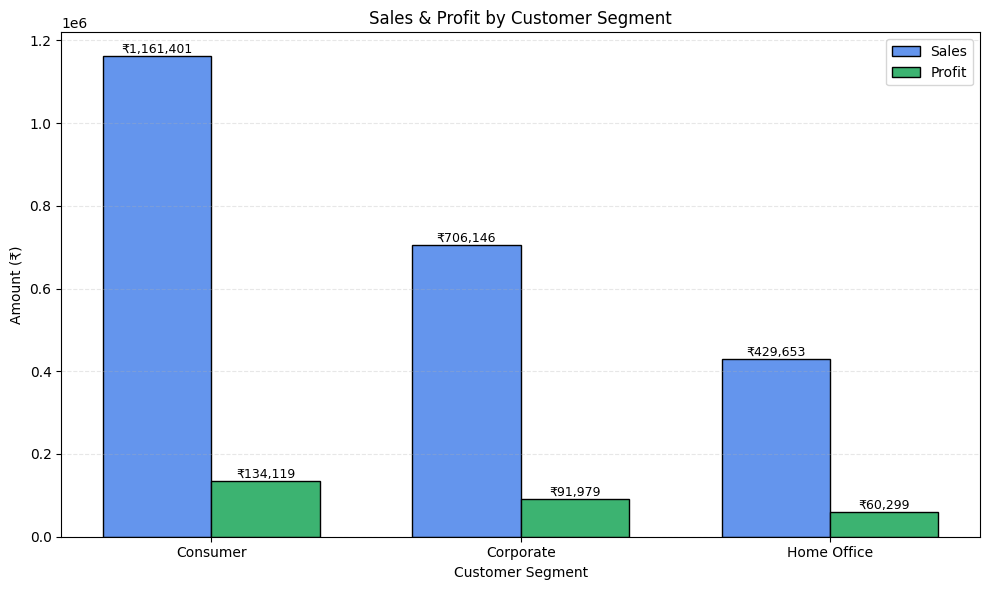

In [81]:
# Data
segments = segment_analysis.index.tolist()    # To Convert index to list
sales = segment_analysis['Sales'].values      # To Use numpy array for positional indexing
profits = segment_analysis['Profit'].values

# Setting bar positions
x = np.arange(len(segments))
width = 0.35

# Plotting
plt.figure(figsize=(10,6))
bars1 = plt.bar(x - width/2, sales, width, label='Sales', color='cornflowerblue', edgecolor='black')
bars2 = plt.bar(x + width/2, profits, width, label='Profit', color='mediumseagreen', edgecolor='black')

# Adding data labels
for i in range(len(x)):
    plt.text(x[i] - width/2, sales[i], f'₹{sales[i]:,.0f}', ha='center', va='bottom', fontsize=9)
    plt.text(x[i] + width/2, profits[i], f'₹{profits[i]:,.0f}', ha='center', va='bottom', fontsize=9)

# Formatting
plt.title('Sales & Profit by Customer Segment')
plt.xticks(x, segments)
plt.xlabel('Customer Segment')
plt.ylabel('Amount (₹)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

# Saving the plot
plt.savefig('segment_sales_profit.png', dpi=300, bbox_inches='tight')
plt.show() #Showing the plot

In [82]:
#Question7. Analyze the sales to profit ratio:

In [83]:
# Sales to Profit Ratio by Category
category_ratio = data.groupby('Category')[['Sales', 'Profit']].sum()
category_ratio['Sales to Profit Ratio'] = (category_ratio['Sales'] / category_ratio['Profit']).round(2)
print(category_ratio)

                       Sales       Profit  Sales to Profit Ratio
Category                                                        
Furniture        741999.7953   18451.2728                  40.21
Office Supplies  719047.0320  122490.8008                   5.87
Technology       836154.0330  145454.9481                   5.75


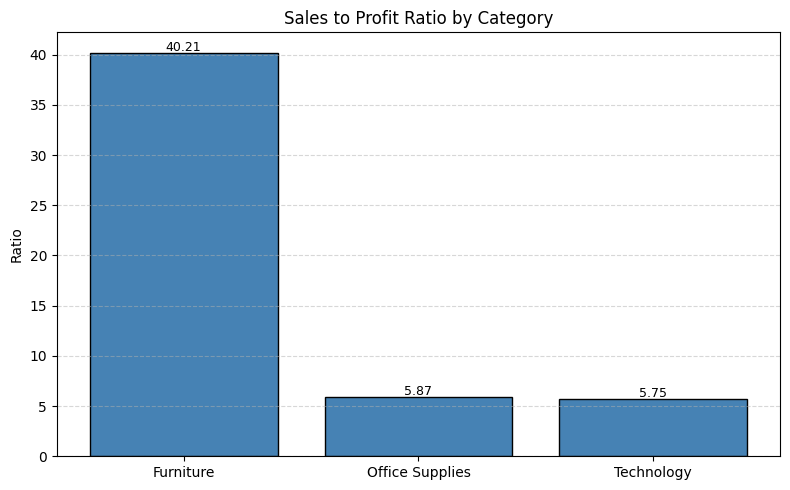

In [85]:
# Plotting Sales to Profit Ratio by Category
plt.figure(figsize=(8,5))
plt.bar(category_ratio.index, category_ratio['Sales to Profit Ratio'], color='steelblue', edgecolor='black')

# Adding data labels
for idx, val in enumerate(category_ratio['Sales to Profit Ratio']):
    plt.text(idx, val + 0.2, f'{val:.2f}', ha='center', fontsize=9)

plt.title('Sales to Profit Ratio by Category')
plt.ylabel('Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

#Saving the Plot:
plt.savefig('sales_to_profit_ratio_by_category.png', dpi=300, bbox_inches='tight')
plt.show() #Showing the plot